In [16]:
#Siraj Hassan
#CSCI 5461 HW3 
#This was orignally made in jupiter notebooks

from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import math
import pandas as pd
from operator import itemgetter
import scipy.misc


def getNumCol(file):
    with open(file, 'r') as f:
        num_cols = len(f.readline().split())
        f.seek(0)
    return(num_cols)




#takes in array of orginal protiens neighbors
#take in neighArr, which is the array of one of orginal protiens's neighbor's neighbors 
#returns the number of shared neighbors. (connections)
def countNeighbors(orig,origList, neighList):
    count = 0
    for p in origList:
        if p == key:
            break
        
        if p in neighList :
            count +=1 

    return count

#used in problem 3
#remove protien interactions to themselves.
def getSelfInterData(arr):
    rmvInd = [] 
    i = 0
    for a in arr:
        if a[0] == a[1]:
            rmvInd.append(i)
        i+=1

    return(rmvInd)


#used in problem 3
#take ppi numpy array in and make dictionary where
#values are the protien and keys are the protiens it interacts with
def makePPIDict(arr):
    i = 0
    pDic = {}
    #take ppi, and turn it into a dictionary:
    #pDic has each protien as a key, array of interactions as values - protien:[v1,v2...]
    while(i < len(ppi)):
    
        if ppi[i][0] not in pDic:  
            pDic.update({ppi[i][0]:[]}) #add new protien into dictionary

        pDic[ppi[i][0]].append(ppi[i][1]) #append interaction protien

        i+=1
        
        
    return pDic
        

    

ppi = np.loadtxt('Human_PPI.csv', dtype = str, delimiter = '\t', skiprows=1,usecols = (0,1), unpack = False )
#remove the selfInteractions too 

ppi = np.delete(ppi,getSelfInterData(ppi),axis=0)
print(ppi)

lit = np.loadtxt('Lit_degrees.csv', dtype = str, delimiter = '\t', skiprows=1 , usecols = (0,1) , unpack = False )
deg = np.loadtxt('Lit_degrees.csv', dtype = float, delimiter = '\t', skiprows=1 ,usecols = 1, unpack = False )
genes = np.loadtxt('Lit_degrees.csv', dtype = str, delimiter = '\t', skiprows=1 ,usecols = 0, unpack = False ) 

[['AAMP' 'VPS52']
 ['AAMP' 'BHLHE40']
 ['AAMP' 'AEN']
 ...
 ['NOTCH2NL' 'KRTAP4-11']
 ['KRTAP26-1' 'KRTAP5-6']
 ['FAM153C' 'LOC100288778']]


In [17]:
#Problem 1: -------------------------------------------------------
#seperate protiens
print('Number of protien interactions:' , len(ppi))
    





Number of protien interactions: 13427


Gene  GOLGA2 has the highest index at  234  degrees


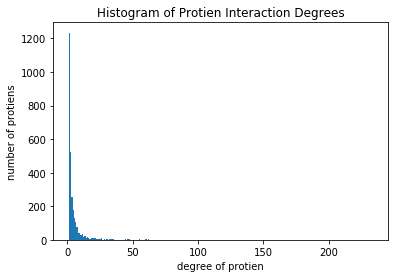

In [18]:
# Problem2: ------------------------------------------------------

#Now we have the data, lets analyze it. 
#Measure the degree of each protien with at least interaction then plot a histogram of it...

pDic = makePPIDict(ppi)

#figure out the lengths of each protiens key(number of interactions)
numInteractions = [[],[]]

#END -- I need to make a new array that records the size of each key's value..\

for key, value in pDic.items():
    #create list with name and number of interactions
    numInteractions[0].append(key)
    numInteractions[1].append(len(value))
    
#print(numInteractions)

highestInd = numInteractions[1].index(max(numInteractions[1]))

plt.hist(numInteractions[1], bins= int(max(numInteractions[1])), range = (1,numInteractions[1][highestInd]))
plt.title("Histogram of Protien Interaction Degrees")
plt.xlabel('degree of protien')
plt.ylabel('number of protiens')

print('Gene ', numInteractions[0][highestInd], 'has the highest index at ' , numInteractions[1][highestInd] , ' degrees' )




PSMC3 has interactions with protiens:  ['PSMC6', 'PSMD9', 'KDM1A', 'AMOTL2']
PSMC3 has clustering coefficient: 0.16666666666666666


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


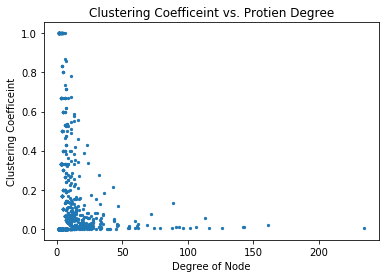

In [21]:
#Problem 3: --------------------------------------------------------------------------------------

   
pDic = makePPIDict(ppi)
name = []
xData = [] #number of neighbors
yData = [] #clustering coefficient of protien

#figure out clustering coefficient for each protien....
#key is the protien
#value is an array of protien's neighbors
#TODO: Make sure I am calculating the clustering coefficient correctly..
for key, value in pDic.items(): 
#   print(pDic)
    origNeigh = pDic[key] 
    numCon = []
    for p in origNeigh: 
        n = 0
        if p in pDic:
            n = countNeighbors(key,origNeigh,pDic[p])
        numCon.append(n)
    
#     print(numCon)
 
    neighEdges = sum(numCon)
    numNeigh = len(numCon) 
    totalEdges = scipy.special.comb((numNeigh),2) #TODO: check that this is the right way to do this
    cCoeff = (neighEdges / totalEdges) #cluster coefficient
    
    name.append(key)
    xData.append(numNeigh)
    yData.append(cCoeff)
    
    

    
#     print(neighEdges , '/' ,totalEdges )
#     print(totalEdges)
#     print(key, ':', numCon)
#     print(cCoeff)


plt.scatter(xData,yData,s=5)
plt.title("Clustering Coefficeint vs. Protien Degree")
plt.xlabel('Degree of Node')
plt.ylabel('Clustering Coefficeint')






#Question 3: Investigate PSMC3:
p = 'PSMC3'
n = pDic[p]
ind = name.index(p)
print(p, 'has interactions with protiens: ',n)
print(p, 'has clustering coefficient:' , yData[ind])






  

In [20]:
#Problem 4 ---------------------------------------------------------------------------------------------------------
#run pearson correlation between ppi data and lit degree data.......

#RUN PROBLEM 3 to get the degree data for ppi..



#take ppi data, make it an array of names and degrees 
#take lit degree data, find each protien in it that is in the ppi data, then create an array in the same order as the ppi
#if the ppi protien is not in the lit data or vice versa, remove them from the arrays. 


lit = np.loadtxt('Lit_degrees.csv', dtype = str, delimiter = '\t', skiprows=1 , usecols = (0,1) , unpack = False )
#deg exist (see top)
#genes exist (see top)

# print(lit)
# print(ppi)


# name, lit data, ppi data
bothName = []
litDeg = []
ppiDeg = []
cCo = []

i = 0

for key,value in pDic.items(): 
     
    try:
    #check and see if gene in ppi is in lit data set
        ind = np.where(genes == key) #get matching gene index
        bothName.append(key)
        litDeg.append(int(deg[ind][0]))
        ppiDeg.append(xData[i])
        cCo.append(yData[i])
        i+=1 
        
    except:
        
        #gene not in the Lit data set,go to next one
        i+=1
        continue
        
# print(bothName[0]) # now we have an array with the name, the
# print(litDeg[0])
# print(ppiDeg[0])


#PART A
#calculate pearson correlation
pC = np.corrcoef(litDeg,ppiDeg)[0,1]#calculate pearson coefficient
print('Pearson Correlation between lit Data and ppi Data: ',pC)


#PART B
#find protien with 10 interactions in ppi, none in lit, and cCoef > .2

i = 0
while(i<len(ppiDeg)):
    if ( (ppiDeg[i]>= 10) &(litDeg[i] == 0) & (cCo[i] >= 0.2) ):
        print(bothName[i], 'at index' , i , 'has the correct attributes')
        i+=1
    else:
        i+=1
        
        
print(pDic['COL8A1'])
print(cCo[197])

        

    
        
    
    

        
    
    
        
    
    
    
    
    
    
    
    
    
    









Pearson Correlation between lit Data and ppi Data:  0.14240839990724333
COL8A1 at index 197 has the correct attributes
NPBWR2 at index 389 has the correct attributes
SMCP at index 579 has the correct attributes
OTX1 at index 667 has the correct attributes
ZNF124 at index 1110 has the correct attributes
SLC23A1 at index 1430 has the correct attributes
GNE at index 1437 has the correct attributes
MAPKBP1 at index 1710 has the correct attributes
CHIC2 at index 1842 has the correct attributes
KCTD9 at index 2085 has the correct attributes
C19orf66 at index 2179 has the correct attributes
FAM124B at index 2450 has the correct attributes
TXNDC5 at index 2500 has the correct attributes
KRTAP3-2 at index 2527 has the correct attributes
KRTAP9-2 at index 2528 has the correct attributes
ZNF587 at index 2580 has the correct attributes
KRTAP9-4 at index 2592 has the correct attributes
KRTAP4-2 at index 2594 has the correct attributes
ZNF417 at index 2742 has the correct attributes
KRTAP10-7 at ind